In [25]:
# Import libraries

# Basic
import os
import sys
import numpy as np
import pandas as pd
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')
# Set number of decimals for np print options
np.set_printoptions(precision=3)
import random

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy
import cartopy.crs as crs
import cartopy.feature as cfeature

# ML Sklearn and shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import shap

# Custom functions 
import custom_functions as custom
import netCDF4


In [3]:
orig = np.load('rx1day_BCC-CSM2-MR_historical_r2i1p1f1_gn_19500101-19791231.npy')
resampled = np.load('rx1day_BCC-CSM2-MR_historical_r2i1p1f1_gn_19500101-19791231_resampled.npy')

In [4]:
orig.shape

(160, 320, 30)

In [5]:
resampled.shape

(180, 360, 30)

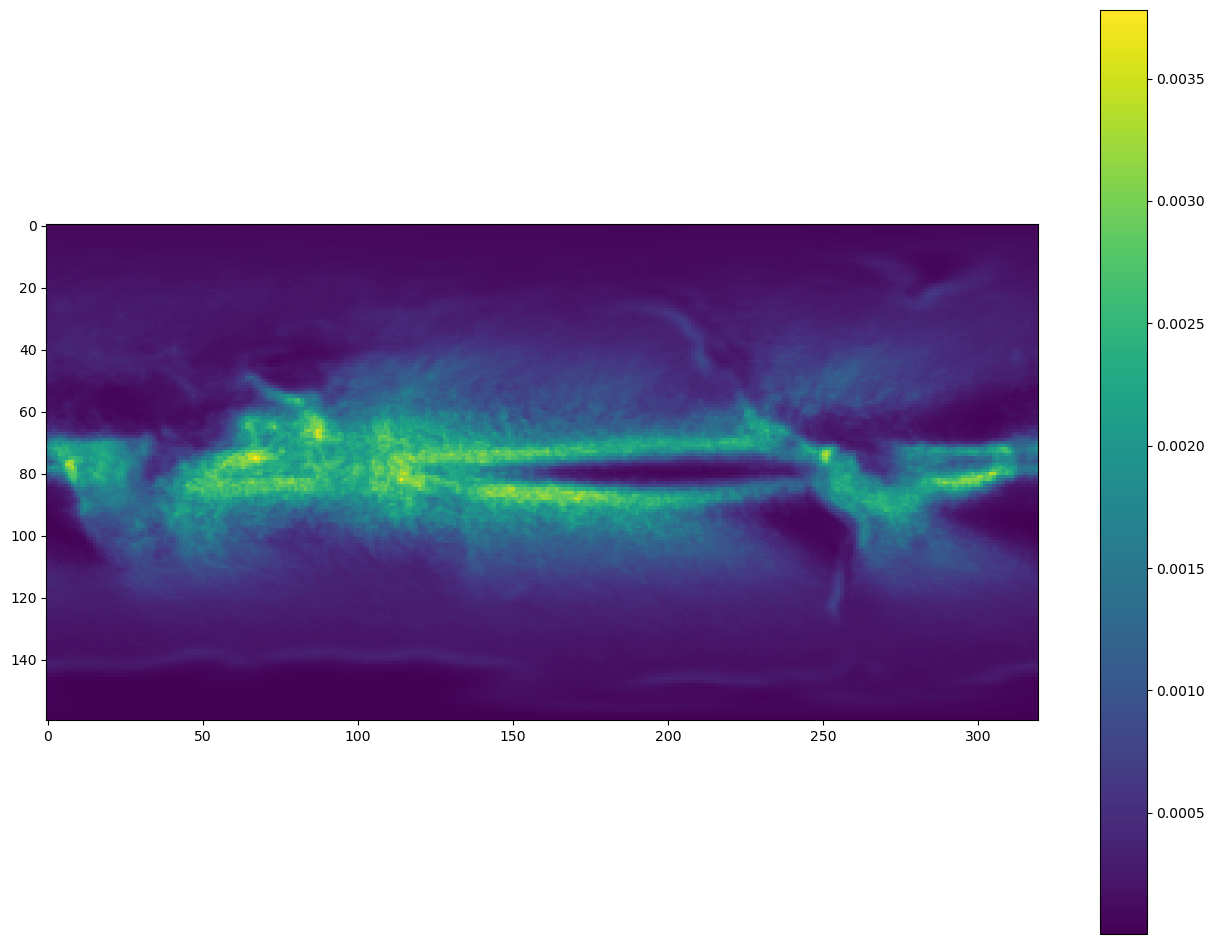

In [12]:
figure = plt.figure(figsize=(16,12))
plt.imshow(np.flipud(np.nanmean(orig, axis= 2)))
plt.colorbar()

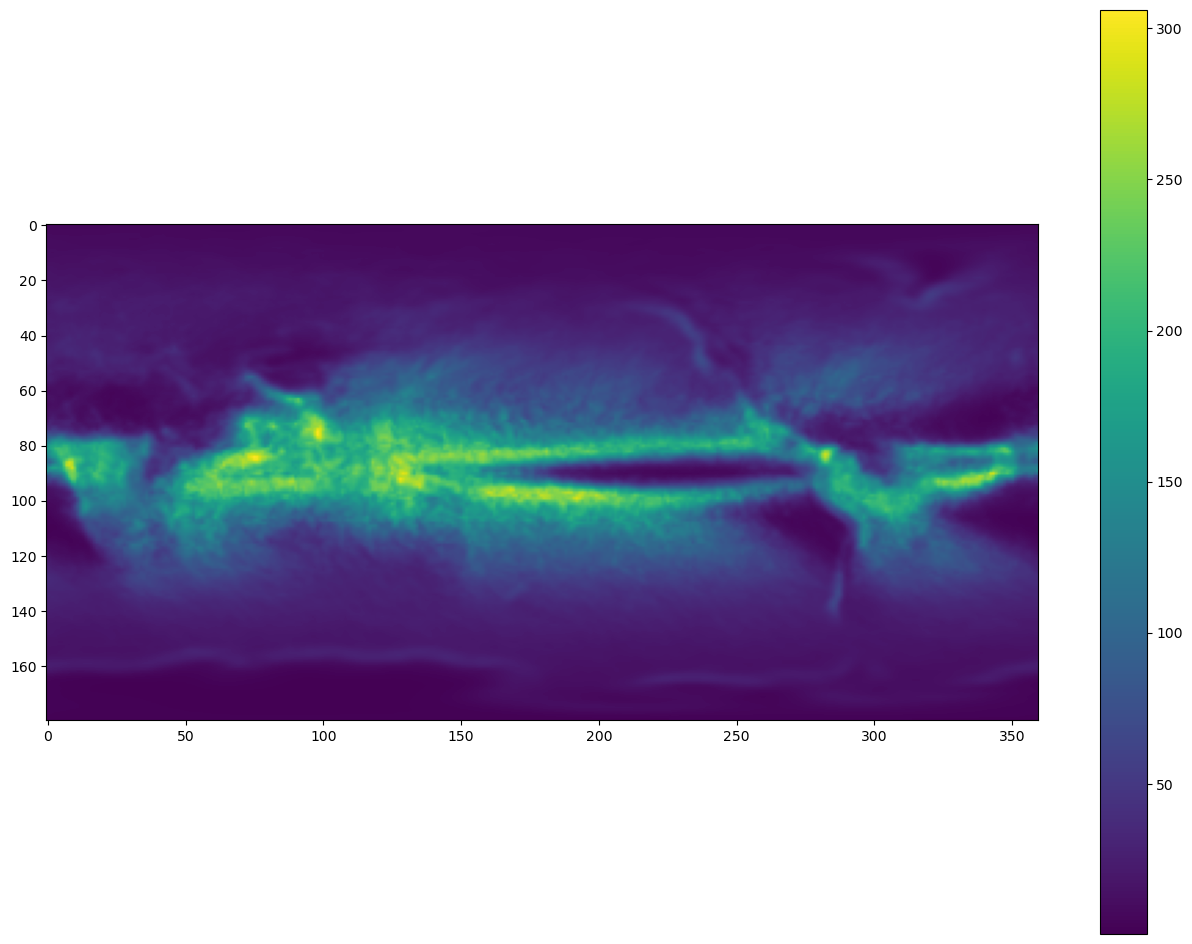

In [29]:
figure = plt.figure(figsize=(16,12))
plt.imshow(np.flipud(np.nanmean(resampled, axis= 2))*24*3600)
plt.colorbar()

In [14]:
r1_data = np.load('rx1day_BCC-CSM2-MR_historical_r1i1p1f1_gn_19500101-19791231.npy')



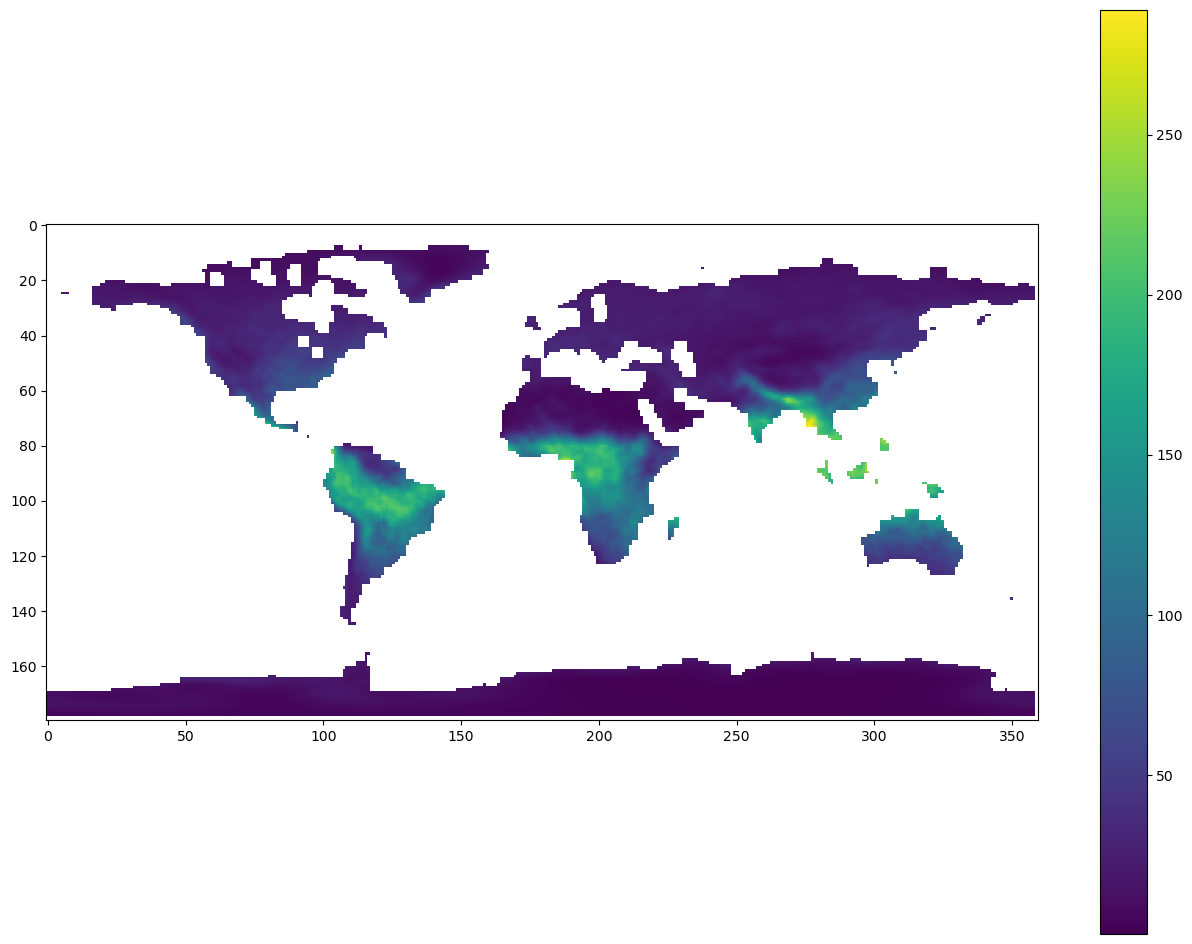

In [16]:
figure = plt.figure(figsize=(16,12))
plt.imshow(np.nanmean(r1_data, axis= 2))
plt.colorbar()

In [17]:
r1_data.shape

(180, 360, 30)

In [20]:
mask = np.nanmean(r1_data, axis=2)
mask[~np.isnan(mask)] = 1

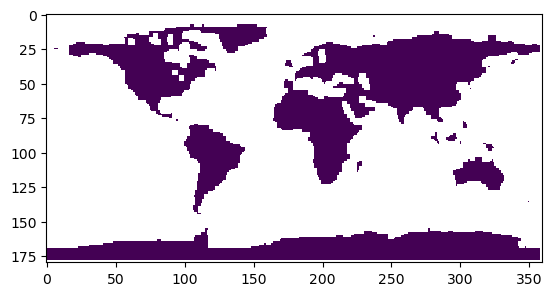

In [24]:
plt.imshow(mask)

In [26]:
# Open the NetCDF file
file_path = 'rx1day_monthly_BCC-CSM2-MR_historical_r2i1p1f1_gn_19500101-19791231.nc'
dataset = netCDF4.Dataset(file_path, 'r')  # 'r' means read-only mode

# List all variables in the file
print(dataset.variables.keys())

dict_keys(['lon', 'lat', 'time_bnds', 'lat_bnds', 'lon_bnds', 'pr', 'time'])


In [27]:
# Access a specific variable (e.g., 'temperature')
pr = dataset.variables['pr']

In [28]:
pr

<class 'netCDF4._netCDF4.Variable'>
float32 pr(time, lat, lon)
    standard_name: precipitation_flux
    long_name: Precipitation
    comment: includes both liquid and solid phases
    units: kg m-2 s-1
    original_name: PRECT
    cell_methods: area: time: mean (interval: 5 minutes)
    cell_measures: area: areacella
    _FillValue: nan
unlimited dimensions: time
current shape = (360, 160, 320)
filling on

In [ ]:
# density = mass / volume
# volume = mass / density = X / 1000 [m/s]
# [X / (1000)]*24*3600*1000 = mm/day
# X * (24*3600) [mm/day]